In [31]:
import sys
import numpy as np, matplotlib.pyplot as plt
sys.path.append('/public4/home/sc57082/Agama-master/')
sys.path.append('/public4/home/sc57082/local')
import glio 
import agama
import galpy
from astropy import units

In [2]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

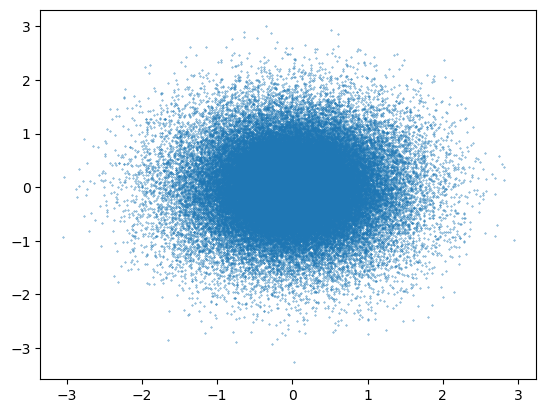

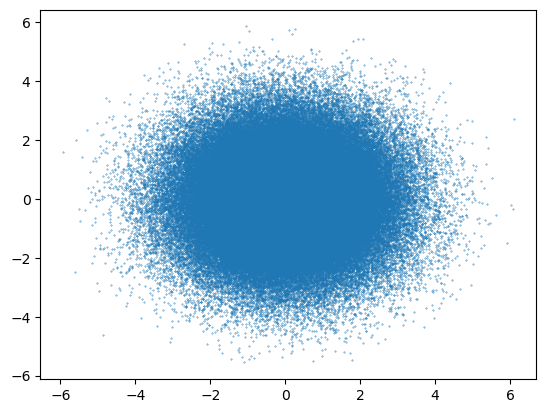

In [68]:
npart0 = 0
npart1 = 0
npart2 = 0
npart3 = 200000
agama.setUnits(mass=1e10, length=1, velocity=1)

pot = agama.Potential(type='King',mass=1e-4, scaleRadius=0.05,W0=8)
df = agama.DistributionFunction(type='QuasiSpherical', potential=pot, density=pot)
bulge = agama.GalaxyModel(potential=pot, df=df).sample(npart3)
plt.scatter(bulge[0][:,0],bulge[0][:,1],s=0.1)
plt.show()
plt.scatter(bulge[0][:,3],bulge[0][:,4],s=0.1)

In [71]:
from galpy.df import kingdf

kdf= kingdf(M=1e6*units.Msun,rt=3.5*units.kpc,W0=8.)
sam= kdf.sample(n=int(2e5))
print(sam.shape)


(200000,)


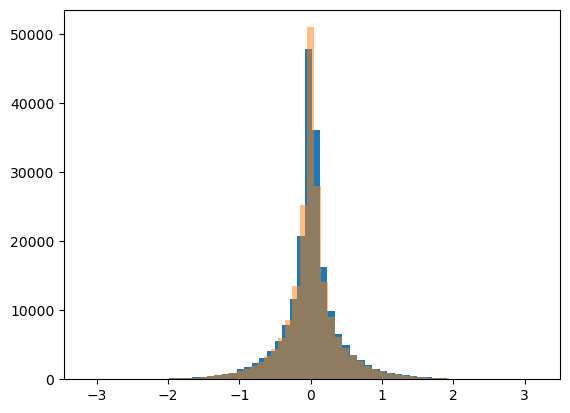

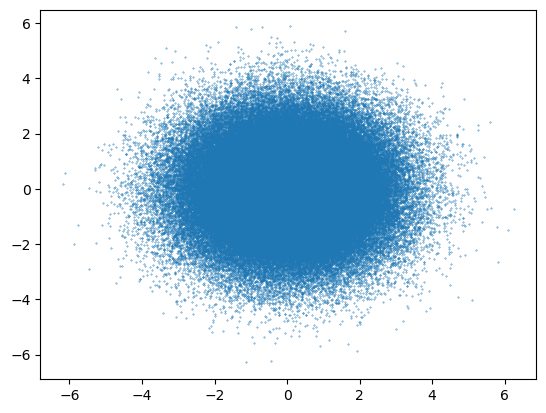

In [72]:
plt.hist(sam.x(),bins=60)
plt.hist(bulge[0][:,0],bins=60,alpha=0.5)
plt.show()
plt.scatter(sam.vx(),sam.vy(),s=0.1)

In [4]:
s = glio.GadgetSnapshot(None)
s.header.npart = np.array([0, npart1, npart2, npart3, 0, 0]).astype('int')
s.header.num_files = np.array([1]).astype('int')

if npart3!=0:
    s.pos[3]  = bulge[0][:,:3].astype('float32')
    s.vel[3]  = bulge[0][:,3:].astype('float32')
    s.mass[3] = bulge[1].astype('float32')
    s.ID[3]   = np.arange(npart3).astype('uint32') + npart0 + npart1 + npart2 +1

print(s.mass[3])
foutput = '/public4/home/sc57082/GC/ICs/cusp/ndm8.ini'
s.save(foutput)

[4.992865e-10 4.992865e-10 4.992865e-10 ... 4.992865e-10 4.992865e-10
 4.992865e-10]
/public4/home/sc57082/local/glio/snapshot.py:86: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.array(values, dtype=dtype)



In [73]:
0.00032*50**0.5

0.0022627416997969526